## Machine learning

Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task.

![alt-текст](images/ml_map.jpg)

## Data preprocessing with scikit-learn

In industry, there is quite a bit of overlap between machine learning engineering and data science. Both jobs involve working with data, such as data analysis and data preprocessing.

The main task for machine learning engineers is to first analyze the data for viable trends, then create an efficient input pipeline for training a model. This process involves using libraries like NumPy and pandas for handling data, along with machine learning frameworks like TensorFlow for creating the model and input pipeline.

While the NumPy and pandas libraries are also used in data science, the Data Preprocessing section will cover one of the core libraries that is specific to industry-level data science: scikit-learn. Data scientists tend to work on smaller datasets than machine learning engineers, and their main goal is to analyze the data and quickly extract usable results. Therefore, they focus more on traditional data inference models (found in scikit-learn), rather than deep neural networks.

The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement **import sklearn**.

### Data standartization

Data can contain all sorts of different values. For example, Olympic 100m sprint times will range from 9.5 to 10.5 seconds, while calorie counts in large pepperoni pizzas can range from 1500 to 3000 calories. Even data measuring the exact same quantities can range in value (e.g. weight in kilograms vs. weight in pounds).

When data can take on any range of values, it makes it difficult to interpret. Therefore, data scientists will convert the data into a standard format to make it easier to understand. The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of converting data into this format is called data standardization.

Data standardization is a relatively simple process. For each data value, x, we subtract the overall mean of the data, μ, then divide by the overall standard deviation, σ. The new value, z, represents the standardized data value. Thus, the formula for data standardization is:

$$ z = \frac{x - \mu}{\sigma} $$

#### NumPy and scikit-learn

For most scikit-learn functions, the input data comes in the form of a NumPy array.


The scikit-learn data preprocessing module is called <span style="color:red">**sklearn.preprocessing**</span>. One of the functions in this module, <span style="color:blue">**scale**</span>, applies data standardization to a given axis of a NumPy array.

In [1]:
import numpy as np
from sklearn.preprocessing import scale

# predefined pizza data
# each row represents individual data observation, each column represents a particular feature of the data
pizza_data = np.array(
    [
        [2100,   10,  800],
        [2500,   11,  850],
        [1800,   10,  760],
        [2000,   12,  800],
        [2300,   11,  810]
    ]
)

# Standardizing each column of pizza_data
col_standardized = scale(pizza_data)
print(f'Pizza data: \n{col_standardized}')

# Column means (rounded to nearest thousandth)
col_means = col_standardized.mean(axis=0).round(decimals=3)
print(f'Means: \n{col_means}')

# Column standard deviations
col_stds = col_standardized.std(axis=0)
print(f'Standard deviations: \n{col_stds}')

Pizza data: 
[[-0.16552118 -1.06904497 -0.1393466 ]
 [ 1.4896906   0.26726124  1.60248593]
 [-1.40693001 -1.06904497 -1.53281263]
 [-0.57932412  1.60356745 -0.1393466 ]
 [ 0.66208471  0.26726124  0.2090199 ]]
Means: 
[ 0. -0.  0.]
Standard deviations: 
[1. 1. 1.]


We normally standardize the data independently across each feature of the data array. This way, we can see how many standard deviations a particular observation's feature value is from the mean.

For example, the second data observation in pizza_data has a net weight of 1.6 standard deviations above the mean pizza weight in the dataset.

### Data scaling

Apart from standardizing data, we can also scale data by compressing it into a fixed range. One of the biggest use cases for this is compressing data into the range [0, 1]. This allows us to view the data in terms of proportions, or percentages, based on the minimum and maximum values in the data.

The formula for scaling based on a range is a two-step process. For a given data value, x, we first compute the proportion of the value with respect to the min and max of the data d_min and d_max, respectively) and scale to specified range [r_min, r_max].

$$
    x_{prop} = \frac{x - d_{min}}{d_{max} - d_{min}}
$$

$$
    z = x_{prop} * (r_{max} - r_{min}) + d_{min}
$$

#### Range compression in scikit-learn

The <span style="color:blue">**MinMaxScaler**</span> transformer performs the range compression using the previous formula. Specifically, it scales each feature (column) of the data to a given range (where the default range is [0, 1]).

**Warning**: Data can be skewed in presence of outliers => Robust scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

# predefined data
data = np.array(
    [
        [ 1.2,  3.2],
        [-0.3, -1.2],
        [ 6.5, 10.1],
        [ 2.2, -8.4]
    ]
)

default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(data)
print(f'After default transformation: \n{transformed}')

custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(data)
print(f'After custom transformation: \n{transformed}')


new_data = np.array(
    [
        [ 1.2, -0.5],
        [ 5.3,  2.3],
        [-3.3,  4.1]
    ]
)
default_scaler.fit(data)
print('Scaler params: ', default_scaler.data_min_, default_scaler.data_max_)
transformed = default_scaler.transform(new_data)
print(f'Different fit and transform transformation: \n{transformed}')

After default transformation: 
[[0.22058824 0.62702703]
 [0.         0.38918919]
 [1.         1.        ]
 [0.36764706 0.        ]]
After custom transformation: 
[[-0.89705882  1.13513514]
 [-2.         -0.05405405]
 [ 3.          3.        ]
 [-0.16176471 -2.        ]]
Scaler params:  [-0.3 -8.4] [ 6.5 10.1]
Different fit and transform transformation: 
[[ 0.22058824  0.42702703]
 [ 0.82352941  0.57837838]
 [-0.44117647  0.67567568]]


#### Robust scaling in scikit-learn

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rather than the min-max, so that it is robust to outliers. 

$$
    z = \frac{x - median(X)}{IQR}
$$

In [20]:
from sklearn.preprocessing import RobustScaler

# predefined data
data = np.array(
    [[ 1.2,  2.3],
    [ 2.1,  4.2],
    [-1.9,  3.1],
    [-2.5,  2.5],
    [ 0.8,  3. ],
    [ 6.3,  2.1],
    [-1.5,  2.7],
    [ 1.4,  2.9],
    [ 1.8,  3.2]]
)

robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)
print(transformed)

[[ 0.         -1.        ]
 [ 0.27272727  2.16666667]
 [-0.93939394  0.33333333]
 [-1.12121212 -0.66666667]
 [-0.12121212  0.16666667]
 [ 1.54545455 -1.33333333]
 [-0.81818182 -0.33333333]
 [ 0.06060606  0.        ]
 [ 0.18181818  0.5       ]]


#### Normalizer

The normalizer scales each observation (row - vector) by dividing each component by vector's magnitude in n-dimensional space for n number of features.

$$
    X = [x_1, x_2, ..., x_m]
$$

$$
    X_{L2} = [\frac{x_1}{l}, \frac{x_2}{l}, ...,\frac{x_m}{l}],\ where\  l = \sqrt{\sum\limits_{i=1}^{m} x_i^2}
$$

In [21]:
from sklearn.preprocessing import Normalizer

# predefined data
data = np.array(
    [[4, 1, 2, 2],
    [3, 4, 0, 0],
    [7, 5, 9, 2]]
)

normalizer = Normalizer()
transformed = normalizer.fit_transform(data)
print(transformed)

[[0.8        0.2        0.4        0.4       ]
 [0.6        0.8        0.         0.        ]
 [0.55513611 0.39652579 0.71374643 0.15861032]]


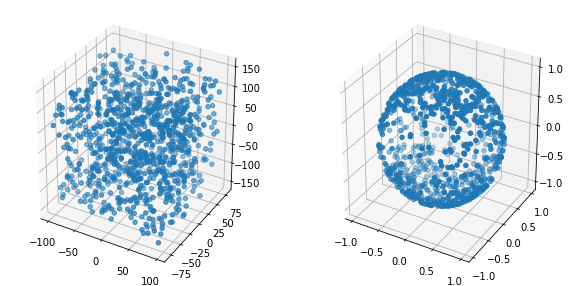

In [35]:
# More complicated example

from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

#### Resume of preprocessing techniques
![alt-текст](images/preproc_techniqs.png)

### PCA - Principal component analysis

Most datasets contain a large number of features, some of which are redundant or not informative. Some features can correlate with each other and describe the same thing, for example features that describe weather in different units (Celsius and Fahrenheit).

This situation can be very harmful, because if we have some noise in our observations, the errors will be counted many times. That way our prediction will be influenced by these errors.

To prevent this damage, we can extract new uncorrelated latent features (which are really a linear combination of original features) from our dataset. Important point here is that as we conserve only uncorrelated features, (that keep most of variability) we perform dimensionality reduction of our dataset.

![alt-текст](images/pca_example.png)

#### PCA Algorithm

1. Get data matrix **X**, where each column is a feature, each row is an observation
2. Calculate mean of each column (feature)
$$
    \mu_j = \frac{1}{n}*\sum\limits_{i=1}^{n} x_{ij}
$$
3. Subtract mean from data
$$ M = X - \mu $$
4. Calculate the covariance matrix: $$ Cov(X) = \frac{M^TM}{n-1} $$
5. Find eigenvalues and eigenvectors of **Cov(M)**
$$ A = Cov(X) $$
$$ AQ = Q\Lambda $$
$$ A = Q\Lambda Q^{-1} $$
6. Sort eigenvalues in descending order and choose corresponding **k** eigenvectors
$$ Let\ V_i\ be\ eigenvector,\ that\ corresponds\ \lambda_i \ (eigenvalue)\ after\ sorting\ procedure $$
$$ P = [V_1, V_2, ..., V_k] $$
7. Project X onto P
$$ newX = XP $$

In [91]:
# Lets code it by ourselves

def PCA(X, n_components=None):
    n, m = X.shape
    if n_components is None:
        n_components = m - 1

    mu = X.mean(axis=0)
    M = X - mu
    assert np.allclose(M.mean(axis=0), np.zeros(m))
    C = np.dot(M.T, M) / (n - 1)
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    eigen_vals = eigen_vals[:n_components]
    eigen_vecs = eigen_vecs[:, :n_components]
    X_pca = np.dot(M, eigen_vecs)
    return X_pca

X = np.array(
    [[ 1.5,  3. ,  9. , -0.5,  1. ],
    [ 2.2,  4.3,  3.5,  0.6,  2.7],
    [ 3. ,  6.1,  1.1,  1.2,  4.2],
    [ 8. , 16. ,  7.7, -1. ,  7.1]]
)

print(PCA(X).round(3))

[[ 4.8600e+00  4.6300e+00  4.7000e-02 -0.0000e+00]
 [ 3.7990e+00 -1.3180e+00 -1.2700e-01  0.0000e+00]
 [ 1.8630e+00 -4.2260e+00  8.9000e-02 -0.0000e+00]
 [-1.0522e+01  9.1400e-01 -9.0000e-03 -0.0000e+00]]


In [89]:
from sklearn.decomposition import PCA

pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
pc = pca_obj.fit_transform(X).round(3)
print(pc)
print(pca_obj.explained_variance_)

pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(X).round(3)
print('\n', pc)
print(pca_obj.explained_variance_)

pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(X).round(3)
print('\n', pc)
print(pca_obj.explained_variance_)

[[-4.8600e+00  4.6300e+00 -4.7000e-02  0.0000e+00]
 [-3.7990e+00 -1.3180e+00  1.2700e-01  0.0000e+00]
 [-1.8630e+00 -4.2260e+00 -8.9000e-02  0.0000e+00]
 [ 1.0522e+01  9.1400e-01  9.0000e-03  0.0000e+00]]
[5.07439495e+01 1.39547492e+01 8.80135350e-03 7.29552574e-32]

 [[-4.8600e+00  4.6300e+00 -4.7000e-02]
 [-3.7990e+00 -1.3180e+00  1.2700e-01]
 [-1.8630e+00 -4.2260e+00 -8.9000e-02]
 [ 1.0522e+01  9.1400e-01  9.0000e-03]]
[5.07439495e+01 1.39547492e+01 8.80135350e-03]

 [[-4.86   4.63 ]
 [-3.799 -1.318]
 [-1.863 -4.226]
 [10.522  0.914]]
[50.7439495  13.95474915]


### Linear regression

One of the main objectives in both machine learning and data science is finding an equation or distribution that best fits a given dataset. This is known as data modeling, where we create a model that uses the dataset's features as independent variables to predict output values for some dependent variable (with minimal error). However, it is incredibly difficult to find an optimal model for most datasets, given the amount of noise (i.e. random errors/fluctuations) in real world data.

Since finding an optimal model for a dataset is difficult, we instead try to find a good approximating distribution. In many cases, a linear model (a linear combination of the dataset's features) can approximate the data well. The term linear regression refers to using a linear model to represent the relationship between a set of independent variables and a dependent variable.
$$ y = ax_1+bx_2+cx_3+d $$

#### Basic linear regression (least squares regression)

![alt-текст](images/ols_matrix.png)

In [3]:
def linear_regression(X, y):
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return beta

In [5]:
pizza_data = np.array(
    [[1, 2100,  800],
    [1, 2500,  850],
    [1, 1800,  760],
    [1, 2000,  800],
    [1, 2300,  810]]
)
pizza_prices = np.array([10.99, 12.5, 9.99, 10.99, 11.99])
betas = linear_regression(pizza_data, pizza_prices)
betas

array([2.33765873e+00, 3.30912698e-03, 2.32936508e-03])

In [67]:
pizza_data_shorten = np.array(
    [[2100,  800],
    [2500,  850],
    [1800,  760],
    [2000,  800],
    [2300,  810]]
)
pizza_prices_shorten = np.array([10.99, 12.5, 9.99, 10.99, 11.99])

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(pizza_data_shorten, pizza_prices_shorten)
print(reg.intercept_, reg.coef_)

2.3376587301587346 [0.00330913 0.00232937]


We can retrieve the coefficient of determination (or R2 value) using the score function applied to the dataset and labels. The R2 value tells us how close of a fit the linear model is to the data, or in other words, how good of a fit the model is for the data.

In [75]:
sklearn_r2 = reg.score(pizza_data_shorten, pizza_prices_shorten)
sklearn_r2

0.9758349388652625

#### Some explanation about R2-score
![alt-текст](images/determ_coef.png)

$$
    R^2 = 1 - \frac{SE_{line}}{SE_\bar{Y}}
$$

In [76]:
# Lets code R2 by ourselves

def r2(X, b, y):
    y_demeaned = y - y.mean()
    SE_y_hat = sum([y_i ** 2 for y_i in y_demeaned])
    SE_line = sum([(y_i - np.dot(b, x_i))**2 for x_i, y_i in zip(X, y)])
        
    return 1 - SE_line/SE_y_hat

In [77]:
custom_r2 = r2(pizza_data, betas, pizza_prices)
custom_r2

0.9758349388652625

In [78]:
np.allclose(custom_r2, sklearn_r2)

True

### Practice

X: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y: 
 [0 1 2]
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


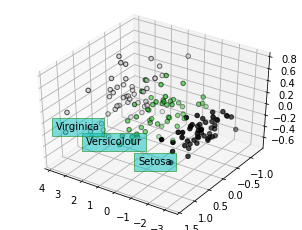

In [128]:
# Reduce number of dimensions to understand data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('X: \n', X[:5])
print('y: \n', np.unique(y))
print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=38, azim=124)

pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='g', facecolor='c'))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

In [134]:
np.random.seed(5)

boston = datasets.load_boston()
X = boston.data
y = boston.target

print('X shape: \n', X.shape)
print('X: \n', X[:5])
print('y shape: \n', y.shape)
print('y: \n', y[:5])
print('Features: ', boston.feature_names)

X shape: 
 (506, 13)
X: 
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
y shape: 
 (506,)
y: 
 [24.  21.6 34.7 33.4 36.2]
Features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [136]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.intercept_, reg.coef_, reg.score(X, y))

# Try to enhance it

36.459488385090125 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 0.7406426641094095
